# Infinite Families for the Godsil-Lato Graph on 8 Vertices

Is there an infinite family that generalizes the Godsil-Lato graph on 8 vertices, whose adjacency matrix is $I_2 \otimes H(C_4) + \sigma_y \otimes J_4$?

In [1]:
# %load adj_functions.sage
import numpy as np
from numpy import linalg

################################################################################
# Function: idempotents                                                        #
#                                                                              #
# Purpose: find principal idempotents of a Hermitian matrix                    #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#                                                                              #
# Returns: principal idempotents, eigenvalues                                  #
#                                                                              #
################################################################################

def idempotents(A):
    if not matrix(A).is_hermitian():
        print("A is not Hermitian")
        return []
    # Extracts eigenvalues and eigenvectors
    W,V = linalg.eigh(A)
    # Converts eigenvectors into orthonormal basis
    Q, R = linalg.qr(V) 
    Q = matrix(Q)
    # Number of eigenvectors
    A = np.matrix(A)
    n = len(A)
    idems = []
    evals = []
    i = 0
    j = 0
    while i < n:
        # Zero matrix
        E = matrix(n, n, 0)
        # Checks if eigenvectors share an eigenvalue
        while j < n and abs(W[i] - W[j]) < 0.01:
            # Converts eigenvector into column vecror
            v = Q.column(j).column()
            # updates idempotent
            E = E + v*v.conjugate_transpose();
            j = j + 1
        E = E
        idems.append(E)
        evals.append(W[i].round(3))
        i = j
    return idems, evals

################################################################################
# Function: transfer                                                           #
#                                                                              #
# Purpose: return transfer matrix U(t) given adjacency matrix/Hamiltonian      #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   t        float                              time                           #
#   k        integer                            rounding accuracy              #
#                                                                              #
# Returns: transfer U(t)                                                       #
#                                                                              #
################################################################################

def transfer(A, t):
    if not matrix(A).is_hermitian():
        print("A is not Hermitian")
        return []
    idems, evals = idempotents(A)
    # Number of eigenvectors
    A = np.matrix(A)
    n = len(A)
    # Zero matrix
    U = matrix(n, n, 0)
    for i in range(len(idems)):
        # Updates transder matrix
        U = U + exp(-I*t*evals[i])*idems[i]
    return U
#     A = matrix(A)
#     return matrix(exp(-1*I*t*A))

################################################################################
# Function: transfer_at_time_r                                                 #
#                                                                              #
# Purpose: find real part of transfer matrix at specific time and index        #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   i        integer                            row number                     #
#   j        integer                            column number                  #
#                                                                              #
# Returns: real part of U(t) at index [i][j]                                   #
#                                                                              #
################################################################################

def transfer_at_time_r(A,t,i,j):
    U = transfer(A,t)
    if abs(U[i][j].real()) < 0.00001:
        return 0
    return U[i][j].real()

################################################################################
# Function: transfer_at_time_i                                                 #
#                                                                              #
# Purpose: find imaginary part of transfer matrix at specific time and index   #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   i        integer                            row number                     #
#   j        integer                            column number                  #
#                                                                              #
# Returns: imaginary part of U(t) at index [i][j]                              #
#                                                                              #
################################################################################

def transfer_at_time_i(A,t,i,j):
    U = transfer(A,t)
    if abs(U[i][j].imag()) < 0.00001:
        return 0
    return U[i][j].imag()

################################################################################
# Function: transfer_at_time_a                                                 #
#                                                                              #
# Purpose: find absolute value of transfer matrix at specific time and index   #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   i        integer                            row number                     #
#   j        integer                            column number                  #
#                                                                              #
# Returns: absolute value of U(t) at index [i][j]                              #
#                                                                              #
################################################################################

def transfer_at_time_a(A,t,i,j):
    U = transfer(A,t)
    if U[i][j].abs() < 0.00001:
        return 0
    return U[i][j].abs()
    
################################################################################
# Function: parallel                                                           #
#                                                                              #
# Purpose: check whether two vertices are parallel                             #
#                                                                              #
# Arguments:                                                                   #
#   idems    list of matrices     idempotents of an adjacency matrix           #
#   a        integer              first vertex                                 #
#   b        integer              second vertex                                #
#                                                                              #
# Returns: boolean whether vertices are parallel                               #
#                                                                              #
################################################################################

def parallel(a,b,idems):
    for M in idems:
        va = M[a].conjugate()
        vb = M[b]
        anorm=np.sqrt(M[a].dot_product(va))
        bnorm=np.sqrt(M[b].dot_product(M[b].conjugate()))
        if abs(abs(va.dot_product(vb))-anorm*bnorm)>0.0001:
            return False
    return True
    
################################################################################
# Function: cospec                                                             #
#                                                                              #
# Purpose: check whether two vertices are parallel                             #
#                                                                              #
# Arguments:                                                                   #
#   idems    list of matrices     idempotents of an adjacency matrix           #
#   a        integer              first vertex                                 #
#   b        integer              second vertex                                #
#                                                                              #
# Returns: boolean whether vertices are cospectral                             #
#                                                                              #
################################################################################

def cospec(a,b,idems):
    for M in idems:
        if abs(M[a,a]- M[b,b])>0.001:
            return False
    return True

################################################################################
# Function: strcospec                                                          #
#                                                                              #
# Purpose: check whether two vertices are parallel                             #
#                                                                              #
# Arguments:                                                                   #
#   idems    list of matrices     idempotents of an adjacency matrix           #
#   a        integer              first vertex                                 #
#   b        integer              second vertex                                #
#                                                                              #
# Returns: boolean whether vertices are strongly cospectral                    #
#                                                                              #
################################################################################

def strcospec(a,b,idems):
    if cospec(a,b,idems) and parallel(a,b,idems):
        return True
    return False
    
################################################################################
# Function: transfer_plots                                                     #
#                                                                              #
# Purpose: list plots for each entry of transfer matrix from 0 to 3pi          #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   s        character                          choose 'r','i', or 'a'         #
#                                               for real, imaginary, or abs    #
#                                                                              #
# Returns: absolute value of U(t) at index [i][j]                              #
#                                                                              #
################################################################################

def transfer_plots(A,s):
    A = np.matrix(A)
    n = len(A)
    plots = []
    if s == 'r':
        for i in range(n):
            for j in range(n):
                plots.append(plot(transfer_at_time_r(A,x,i,j),0,3*np.pi))
    elif s == 'i':
        for i in range(n):
            for j in range(n):
                plots.append(plot(transfer_at_time_i(A,x,i,j),0,3*np.pi))
    else:
        for i in range(n):
            for j in range(n):
                plots.append(plot(transfer_at_time_a(A,x,i,j),0,3*np.pi))
    chunks = [plots[x:x+n] for x in range(0, len(plots), n)]
    return chunks

# Base case

In [2]:
IB = identity_matrix(2)
HC4B = np.matrix([[0,-1j,0,1j],[1j,0,-1j,0],[0,1j,0,-1j],[-1j,0,1j,0]]); HC4B = matrix(HC4B)
SYB = np.matrix([[0,-1j],[1j,0]]); SYB = matrix(SYB)
J4B = ones_matrix(4,4)
AB =  IB.tensor_product(HC4B)
BB = SYB.tensor_product(J4B)
XB = AB + BB; XB

[   0.0 -1.0*I    0.0  1.0*I -1.0*I -1.0*I -1.0*I -1.0*I]
[ 1.0*I    0.0 -1.0*I    0.0 -1.0*I -1.0*I -1.0*I -1.0*I]
[   0.0  1.0*I    0.0 -1.0*I -1.0*I -1.0*I -1.0*I -1.0*I]
[-1.0*I    0.0  1.0*I    0.0 -1.0*I -1.0*I -1.0*I -1.0*I]
[ 1.0*I  1.0*I  1.0*I  1.0*I    0.0 -1.0*I    0.0  1.0*I]
[ 1.0*I  1.0*I  1.0*I  1.0*I  1.0*I    0.0 -1.0*I    0.0]
[ 1.0*I  1.0*I  1.0*I  1.0*I    0.0  1.0*I    0.0 -1.0*I]
[ 1.0*I  1.0*I  1.0*I  1.0*I -1.0*I    0.0  1.0*I    0.0]

In [3]:
AB

[   0.0 -1.0*I    0.0  1.0*I|   0.0    0.0    0.0    0.0]
[ 1.0*I    0.0 -1.0*I    0.0|   0.0    0.0    0.0    0.0]
[   0.0  1.0*I    0.0 -1.0*I|   0.0    0.0    0.0    0.0]
[-1.0*I    0.0  1.0*I    0.0|   0.0    0.0    0.0    0.0]
[---------------------------+---------------------------]
[   0.0    0.0    0.0    0.0|   0.0 -1.0*I    0.0  1.0*I]
[   0.0    0.0    0.0    0.0| 1.0*I    0.0 -1.0*I    0.0]
[   0.0    0.0    0.0    0.0|   0.0  1.0*I    0.0 -1.0*I]
[   0.0    0.0    0.0    0.0|-1.0*I    0.0  1.0*I    0.0]

In [4]:
BB

[   0.0    0.0    0.0    0.0|-1.0*I -1.0*I -1.0*I -1.0*I]
[   0.0    0.0    0.0    0.0|-1.0*I -1.0*I -1.0*I -1.0*I]
[   0.0    0.0    0.0    0.0|-1.0*I -1.0*I -1.0*I -1.0*I]
[   0.0    0.0    0.0    0.0|-1.0*I -1.0*I -1.0*I -1.0*I]
[---------------------------+---------------------------]
[ 1.0*I  1.0*I  1.0*I  1.0*I|   0.0    0.0    0.0    0.0]
[ 1.0*I  1.0*I  1.0*I  1.0*I|   0.0    0.0    0.0    0.0]
[ 1.0*I  1.0*I  1.0*I  1.0*I|   0.0    0.0    0.0    0.0]
[ 1.0*I  1.0*I  1.0*I  1.0*I|   0.0    0.0    0.0    0.0]

In [5]:
transfer(XB, np.pi/4).round(5)

[ 0.0 -1.0  0.0  0.0  0.0  0.0  0.0  0.0]
[ 0.0  0.0 -1.0  0.0  0.0  0.0  0.0  0.0]
[ 0.0  0.0  0.0 -1.0  0.0  0.0  0.0  0.0]
[-1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0]
[ 0.0  0.0  0.0  0.0  0.0 -1.0  0.0  0.0]
[ 0.0  0.0  0.0  0.0  0.0  0.0 -1.0  0.0]
[ 0.0  0.0  0.0  0.0  0.0  0.0  0.0 -1.0]
[ 0.0  0.0  0.0  0.0 -1.0  0.0  0.0  0.0]

In [6]:
UA = transfer(AB, np.pi/2).round(5); UA

[0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0]
[0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0]
[1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
[0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0]
[0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0]
[0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0]
[0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0]
[0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0]

In [7]:
UB = transfer(BB, np.pi/4).round(5); UB

[ 0.5 -0.5 -0.5 -0.5  0.0  0.0  0.0  0.0]
[-0.5  0.5 -0.5 -0.5  0.0  0.0  0.0  0.0]
[-0.5 -0.5  0.5 -0.5  0.0  0.0  0.0  0.0]
[-0.5 -0.5 -0.5  0.5  0.0  0.0  0.0  0.0]
[ 0.0  0.0  0.0  0.0  0.5 -0.5 -0.5 -0.5]
[ 0.0  0.0  0.0  0.0 -0.5  0.5 -0.5 -0.5]
[ 0.0  0.0  0.0  0.0 -0.5 -0.5  0.5 -0.5]
[ 0.0  0.0  0.0  0.0 -0.5 -0.5 -0.5  0.5]

In [8]:
E, eVal = idempotents(XB)
for i in range(len(eVal)):
    print("Idempotent for", int(eVal[i]))
    print(E[i].round(5))

Idempotent for -4
[   0.125    0.125    0.125    0.125  0.125*I  0.125*I  0.125*I  0.125*I]
[   0.125    0.125    0.125    0.125  0.125*I  0.125*I  0.125*I  0.125*I]
[   0.125    0.125    0.125    0.125  0.125*I  0.125*I  0.125*I  0.125*I]
[   0.125    0.125    0.125    0.125  0.125*I  0.125*I  0.125*I  0.125*I]
[-0.125*I -0.125*I -0.125*I -0.125*I    0.125    0.125    0.125    0.125]
[-0.125*I -0.125*I -0.125*I -0.125*I    0.125    0.125    0.125    0.125]
[-0.125*I -0.125*I -0.125*I -0.125*I    0.125    0.125    0.125    0.125]
[-0.125*I -0.125*I -0.125*I -0.125*I    0.125    0.125    0.125    0.125]
Idempotent for -2
[   0.25  0.25*I   -0.25 -0.25*I     0.0     0.0     0.0     0.0]
[-0.25*I    0.25  0.25*I   -0.25     0.0     0.0     0.0     0.0]
[  -0.25 -0.25*I    0.25  0.25*I     0.0     0.0     0.0     0.0]
[ 0.25*I   -0.25 -0.25*I    0.25     0.0     0.0     0.0     0.0]
[    0.0     0.0     0.0     0.0    0.25  0.25*I   -0.25 -0.25*I]
[    0.0     0.0     0.0     0.0 -0.25*I  

# Case which gives pairs of PST but not MST

Adjacency matrix is $I_n \otimes H(C_4) + \sigma_y \otimes J_{2n}$ for some even positive integer $n$.

In [9]:
def GL_PST_EX(n):
    HC4 = np.matrix([[0,-1j,0,1j],[1j,0,-1j,0],[0,1j,0,-1j],[-1j,0,1j,0]]); HC4 = matrix(HC4)
    SY = np.matrix([[0,-1j],[1j,0]]); SY = matrix(SY)
    Id = identity_matrix(n)
    J = ones_matrix(2*n,2*n)
    A = Id.tensor_product(HC4)
    B = SY.tensor_product(J)
    return A + B

In [10]:
m = 4
Y = GL_PST_EX(m)
UY = transfer(Y, np.pi/2).round(5)
UY

[0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
[0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
[1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
[0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
[0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
[0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
[0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
[0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0]
[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0]
[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0]
[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0]
[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0]
[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0]
[0.0 0.0 0

In [11]:
EY, eValY = idempotents(Y)
for val in eValY:
    print(val.round(5))

-8.0
-2.0
-0.0
2.0
8.0


# Compilation of Attempts

In [12]:
# Geometry

# Ladder with extra rung
# X = np.matrix([[0,-1j,0,0, -1j,-1j,-1j,-1j,   1j,-1j],\
#               [1j,0,-1j,0, -1j,-1j,-1j,-1j,   0,-1j],\
#               [0,1j,0,-1j, -1j,-1j,-1j,-1j,   0,-1j],\
#               [0,0,1j,0,   -1j,-1j,-1j,-1j,   -1j,-1j],\
#               [1j,1j,1j,1j, 0,-1j,0,0,       1j,1j],\
#               [1j,1j,1j,1j, 1j,0,-1j,0,       1j,0],\
#               [1j,1j,1j,1j, 0,1j,0,-1j,       1j,0],\
#               [1j,1j,1j,1j, 0,0,1j,0,       1j,-1j],\
#               [-1j,0,0,1j,  -1j,-1j,-1j,-1j,   0,-1j],\
#               [1j,1j,1j,1j,     -1j,0,0,1j,       1j,0]])

# Ladder with extra node in loop
# X = np.matrix([[0,-1j,0,0, -1j,-1j,-1j,-1j,   1j,0],\
#               [1j,0,-1j,0, -1j,-1j,-1j,-1j,   0,0],\
#               [0,1j,0,-1j, -1j,-1j,-1j,-1j,   0,0],\
#               [0,0,1j,0,   -1j,-1j,-1j,-1j,   -1j,0],\
#               [1j,1j,1j,1j, 0,-1j,0,0,        0,1j],\
#               [1j,1j,1j,1j, 1j,0,-1j,0,       0,0],\
#               [1j,1j,1j,1j, 0,1j,0,-1j,       0,0],\
#               [1j,1j,1j,1j, 0,0,1j,0,         0,-1j],\
#               [-1j,0,0,1j,  0,0,0,0,          0,0],\
#               [0,0,0,0,     -1j,0,0,1j,       0,0]])

# Two Ladders
# X = np.matrix([[0,-1j,0,1j, -1j,-1j,-1j,-1j,  0,0,0,0],\
#               [1j,0,-1j,0,  -1j,-1j,-1j,-1j,  0,0,0,0],\
#               [0,1j,0,-1j,  -1j,-1j,-1j,-1j,  0,0,0,0],\
#               [-1j,0,1j,0,  -1j,-1j,-1j,-1j,  0,0,0,0],\
#               [1j,1j,1j,1j, 0,-1j,0,0,       -1j,-1j,-1j,-1j],\
#               [1j,1j,1j,1j, 1j,0,-1j,0,       -1j,-1j,-1j,-1j],\
#               [1j,1j,1j,1j, 0,1j,0,-1j,       -1j,-1j,-1j,-1j],\
#               [1j,1j,1j,1j, 0,0,1j,0,       -1j,-1j,-1j,-1j],\
#               [0,0,0,0,     1j,1j,1j,1j,      0,-1j,0,1j],\
#               [0,0,0,0,     1j,1j,1j,1j,      1j,0,-1j,0],\
#               [0,0,0,0,     1j,1j,1j,1j,      0,1j,0,-1j],\
#               [0,0,0,0,     1j,1j,1j,1j,      -1j,0,1j,0]])

# G-L Hexagon
# X = np.matrix([[0,1j,1j,0,0,-1j,1j,1j,1j,0,0,0],\
#                [-1j,0,0,-1j,1j,0,-1j,-1j,0,-1j,0,0],\
#                [-1j,0,0,1j,-1j,0,-1j,0,-1j,0,-1j,0],\
#                [0,1j,-1j,0,0,1j,0,1j,0,-1j,0,1j],\
#                [0,-1j,1j,0,0,1j,0,0,1j,0,-1j,1j],\
#                [1j,0,0,-1j,-1j,0,0,0,0,-1j,-1j,-1j],\
#                [-1j,1j,1j,0,0,0,0,1j,1j,0,0,-1j],\
#                [-1j,1j,0,-1j,0,0,-1j,0,0,-1j,1j,0],\
#                [-1j,0,1j,0,-1j,0,-1j,0,0,1j,-1j,0],\
#                [0,1j,0,1j,0,1j,0,1j,-1j,0,0,1j],\
#                [0,0,1j,0,1j,1j,0,-1j,1j,0,0,1j],\
#                [0,0,0,-1j,-1j,1j,1j,0,0,-1j,-1j,0]])

# G-L Hexagon All connections
# X = np.matrix([[0,1j,1j,-1j,-1j,-1j,1j,1j,1j,0,0,0],\
#                [-1j,0,1j,-1j,1j,-1j,-1j,-1j,0,-1j,0,0],\
#                [-1j,-1j,0,1j,-1j,-1j,-1j,0,-1j,0,-1j,0],\
#                [1j,1j,-1j,0,1j,1j,0,1j,0,-1j,0,1j],\
#                [1j,-1j,1j,-1j,0,1j,0,0,1j,0,-1j,1j],\
#                [1j,1j,1j,-1j,-1j,0,0,0,0,-1j,-1j,-1j],\
#                [-1j,1j,1j,0,0,0,0,1j,1j,1j,1j,-1j],\
#                [-1j,1j,0,-1j,0,0,-1j,0,0,-1j,1j,1j],\
#                [-1j,0,1j,0,-1j,0,-1j,0,0,1j,-1j,1j],\
#                [0,1j,0,1j,0,1j,-1j,1j,-1j,0,-1j,1j],\
#                [0,0,1j,0,1j,1j,-1j,-1j,1j,1j,0,1j],\
#                [0,0,0,-1j,-1j,1j,1j,-1j,-1j,-1j,-1j,0]])

# Hypercube With Xs
# X = np.matrix([[0,1j,1j,-1j,1j,1j,1j,0,-1j,1j,1j,0,1j,0,0,0],\
#                [-1j,0,-1j,-1j,-1j,1j,0,-1j,1j,-1j,0,1j,0,1j,0,0],\
#                [-1j,1j,0,-1j,-1j,0,-1j,-1j,1j,0,-1j,1j,0,0,1j,0],\
#                [1j,1j,1j,0,0,1j,1j,-1j,0,1j,1j,-1j,0,0,0,1j],\
#                [-1j,1j,1j,0,0,1j,1j,1j,1j,0,0,0,-1j,1j,1j,0],\
#                [-1j,-1j,0,-1j,-1j,0,1j,-1j,0,1j,0,0,1j,-1j,0,1j],\
#                [-1j,0,1j,-1j,-1j,-1j,0,-1j,0,0,1j,0,1j,0,-1j,1j],\
#                [0,1j,1j,1j,-1j,1j,1j,0,0,0,0,1j,0,1j,1j,-1j],\
#                [1j,-1j,-1j,0,-1j,0,0,0,    0,1j,1j,-1j,1j,1j,1j,0],\
#                [-1j,1j,0,-1j,0,-1j,0,0,    -1j,0,-1j,-1j,-1j,1j,0,-1j],\
#                [-1j,0,1j,-1j,0,0,-1j,0,    -1j,1j,0,-1j,-1j,0,-1j,-1j],\
#                [0,-1j, -1j,1j,0,0,0,-1j,   1j,1j,1j,0,0,1j,1j,-1j],\
#                [-1j,0,0,0,1j,-1j,-1j,0,    -1j,1j,1j,0,0,1j,1j,1j],\
#                [0,-1j,0,0,-1j,1j,0,-1j,    -1j,-1j,0,-1j,-1j,0,1j,-1j],\
#                [0,0,-1j, 0,-1j,0,1j,-1j,   -1j,0,1j,-1j,-1j,-1j,0,-1j],\
#                [0,0,0,-1j,0,-1j,-1j,1j,    0,1j,1j,1j,-1j,1j,1j,0]])

# Hypercube
X = np.matrix([[0,1j,1j,-1j,1j,1j,1j,0,      1,0,0,0,0,0,0,0],\
               [-1j,0,-1j,-1j,-1j,1j,0,-1j,  0,1,0,0,0,0,0,0],\
               [-1j,1j,0,-1j,-1j,0,-1j,-1j,  0,0,1,0,0,0,0,0],\
               [1j,1j,1j,0,0,1j,1j,-1j,      0,0,0,1,0,0,0,0],\
               [-1j,1j,1j,0,0,1j,1j,1j,      0,0,0,0,1,0,0,0],\
               [-1j,-1j,0,-1j,-1j,0,1j,-1j,  0,0,0,0,0,1,0,0],\
               [-1j,0,1j,-1j,-1j,-1j,0,-1j,  0,0,0,0,0,0,1,0],\
               [0,1j,1j,1j,-1j,1j,1j,0,      0,0,0,0,0,0,0,1],\
               [1,0,0,0,0,0,0,0,  0,1j,1j,-1j,1j,1j,1j,0],\
               [0,1,0,0,0,0,0,0,  -1j,0,-1j,-1j,-1j,1j,0,-1j],\
               [0,0,1,0,0,0,0,0,  -1j,1j,0,-1j,-1j,0,-1j,-1j],\
               [0,0,0,1,0,0,0,0,  1j,1j,1j,0,0,1j,1j,-1j],\
               [0,0,0,0,1,0,0,0,  -1j,1j,1j,0,0,1j,1j,1j],\
               [0,0,0,0,0,1,0,0,  -1j,-1j,0,-1j,-1j,0,1j,-1j],\
               [0,0,0,0,0,0,1,0,  -1j,0,1j,-1j,-1j,-1j,0,-1j],\
               [0,0,0,0,0,0,0,1,  0,1j,1j,1j,-1j,1j,1j,0]])

In [13]:
# Playing with spectral decomposition of whole thing

# J8 = ones_matrix(8)
# I2 = identity_matrix(2)
# SY = matrix(np.matrix([[0,-1j],[1j,0]]))

# # eval = -4
# Ia = 1/16*I2.tensor_product(J8) - 1/16*SY.tensor_product(J8) 

# # eval = -2
# cb = np.matrix([[1,1j,-1,-1j,1,1j,-1,-1j],\
#                 [-1j,1,1j,-1,-1j,1,1j,-1],\
#                 [-1,-1j,1,1j,-1,-1j,1,1j],\
#                 [1j,-1,-1j,1,1j,-1,-1j,1],\
#                 [1,1j,-1,-1j,1,1j,-1,-1j],\
#                 [-1j,1,1j,-1,-1j,1,1j,-1],\
#                 [-1,-1j,1,1j,-1,-1j,1,1j],\
#                 [1j,-1,-1j,1,1j,-1,-1j,1]]); cb = matrix(cb)
# Ib = 1/8*I2.tensor_product(cb)

# # eval = 2
# cd = np.matrix([[1,-1j,-1,1j,1,-1j,-1,1j],\
#                 [1j,1,-1j,-1,1j,1,-1j,-1],\
#                 [-1,1j,1,-1j,-1,1j,1,-1j],\
#                 [-1j,-1,1j,1,-1j,-1,1j,1],\
#                 [1,-1j,-1,1j,1,-1j,-1,1j],\
#                 [1j,1,-1j,-1,1j,1,-1j,-1],\
#                 [-1,1j,1,-1j,-1,1j,1,-1j],\
#                 [-1j,-1,1j,1,-1j,-1,1j,1]]); cd = matrix(cd)
# Id = 1/8*I2.tensor_product(cd)

# # eval = 4
# Ie = 1/16*I2.tensor_product(J8) + 1/16*SY.tensor_product(J8) 

# # eval = -8 
# cf = np.matrix([[-1,1j,1,-1j,-1,1j,1,-1j],\
#                 [-1j,-1,1j,1,-1j,-1,1j,1],\
#                 [1,-1j,-1,1j,1,-1j,-1,1j],\
#                 [1j,1,-1j,-1,1j,1,-1j,-1],\
#                 [-1,1j,1,-1j,-1,1j,1,-1j],\
#                 [-1j,-1,1j,1,-1j,-1,1j,1],\
#                 [1,-1j,-1,1j,1,-1j,-1,1j],\
#                 [1j,1,-1j,-1,1j,1,-1j,-1]]); cf = matrix(cf)
# If = 1/8*I2.tensor_product(cb)

# # eval = 8
# cg = np.matrix([[-1,-1j,1,1j,-1,-1j,1,1j],\
#                 [1j,-1,-1j,1,1j,-1,-1j,1],\
#                 [1,1j,-1,-1j,1,1j,-1,-1j],\
#                 [-1j,1,1j,-1,-1j,1,1j,-1],\
#                 [-1,-1j,1,1j,-1,-1j,1,1j],\
#                 [1j,-1,-1j,1,1j,-1,-1j,1],\
#                 [1,1j,-1,-1j,1,1j,-1,-1j],\
#                 [-1j,1,1j,-1,-1j,1,1j,-1]]); cg = matrix(cg)
# Ig = 1/8*I2.tensor_product(cd)

# # eval = 0
# Ic = identity_matrix(16) - 1/8*I2.tensor_product(J8)
# Ic = Ic - Ib - Id
    
# X = -8*Ia + -4*Ib + 0*Ic + 4*Id + 8*Ie

In [14]:
# C8 instead of C4

# HC8 = np.matrix([[0,-1j,0,0,0,0,0,1j],\
#                  [1j,0,-1j,0,0,0,0,0],\
#                  [0,1j,0,-1j,0,0,0,0],\
#                  [0,0,1j,0,-1j,0,0,0],\
#                  [0,0,0,1j,0,-1j,0,0],\
#                  [0,0,0,0,1j,0,-1j,0],\
#                  [0,0,0,0,0,1j,0,-1j],\
#                  [-1j,0,0,0,0,0,1j,0],\
#                  ]); HC8 = matrix(HC8)
# HC4 = np.matrix([[0,-1j,0,1j],[1j,0,-1j,0],[0,1j,0,-1j],[-1j,0,1j,0]]); HC4 = matrix(HC4)
# I2 = identity_matrix(2)
# SY = np.matrix([[0,-1j],[1j,0]]); SY = matrix(SY)
# J = ones_matrix(8,8)
# A = I2.tensor_product(HC8)
# B = SY.tensor_product(J)
# X = A + B

In [15]:
# Playing with spectral decomposition of I \otimes HC4 and SY \otimes J

# IJ = identity_matrix(2).tensor_product(ones_matrix(2))

# a = 1/8*np.matrix([[1,-1j,-1,1j],[1j,1,-1j,-1],[-1,1j,1,-1j],[-1j,-1,1j,1]]); a = matrix(a)
# Ia = IJ.tensor_product(a)

# b = 1/8*np.matrix([[1,1j,-1,-1j],[-1j,1,1j,-1],[-1,-1j,1,1j],[1j,-1,-1j,1]]); b = matrix(b)
# Ib = IJ.tensor_product(b)

# A = 4*Ia - 4*Ib

# # THIS IS THE SAME
# # HC4 = np.matrix([[0,-1j,0,1j],[1j,0,-1j,0],[0,1j,0,-1j],[-1j,0,1j,0]]); HC4 = matrix(HC4)
# # A = identity_matrix(2).tensor_product(ones_matrix(2)).tensor_product(HC4)

# B = SY.tensor_product(identity_matrix(2)).tensor_product(ones_matrix(4))
# X = A + B

# UA = transfer(A, np.pi/4).round(5)
# UB = transfer(B, np.pi/2).round(5)
# UA.swap_rows(0,6)
# UA.swap_rows(1,7)
# UA.swap_rows(8,14)
# UA.swap_rows(9,15)
# # UB.swap_rows(0,6)
# # UB.swap_rows(1,7)
# # UB.swap_rows(8,14)
# # UB.swap_rows(9,15)
# UX = UA*UB; UX

In [16]:
# PLaying with spectral decomposition of HC4 and J

# Ita = 1/2*(E[0].round(5)).tensor_product(identity_matrix(2))
# Itb = 1/2*(E[1].round(5)).tensor_product(identity_matrix(2))
# Itc = 1/2*(E[2].round(5)).tensor_product(identity_matrix(2))
# Itd = 1/2*(E[3].round(5)).tensor_product(identity_matrix(2))

# cce = matrix(np.matrix([[1,-1,1j,-1j],[-1,1,-1j,1j],[-1j,1j,1,-1],[1j,-1j,-1,1]]))
# Ite = 1/8*cce.tensor_product(ones_matrix(2));  
# print(Ite^2 == Ite)

# ccf = matrix(np.matrix([[1,-1,-1j,1j],[-1,1,1j,-1j],[1j,-1j,1,-1],[-1j,1j,-1,1]]))
# Itf = 1/8*ccf.tensor_product(ones_matrix(2));
# print(Itf^2 == Itf)

# c = matrix(np.matrix([[1,-1,1j,-1j],[-1,1,-1j,1j],[-1j,1j,-1,1,],[1j,-1j,1,-1]]))
# It4 = 1/4*identity_matrix(2).tensor_product(c);

# Z = -2*E[0].round(5) + 2*E[2].round(5) + 4*E[3].round(5)
# print(Z)

# R = identity_matrix(8) - (Ita + Itb + Itc + Itd); R
# R^2 == R
# (R + Itb)^2 == R + Itb

# Y = -2*Ita + 0*Itb + 2*Itc + 4*Ite - 4*Itf + 8*Itd
# print(Y)

# HC8 = Y - ones_matrix(8)
# X = identity_matrix(2).tensor_product(HC8) + SY.tensor_product(ones_matrix(8))

# print(X)

In [17]:
UX = transfer(X,np.pi/2).round(5)
UX

[   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0 -1.0*I]
[   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0 -1.0*I    0.0]
[   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0 -1.0*I    0.0    0.0]
[   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0 -1.0*I    0.0    0.0    0.0]
[   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0 -1.0*I    0.0    0.0    0.0    0.0]
[   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0 -1.0*I    0.0    0.0    0.0    0.0    0.0]
[   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0 -1.0*I    0.0    0.0    0.0    0.0    0.0    0.0]
[   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0 -1.0*I    0.0    0.0    0.0    0.0    0.0    0.0    0.0]
[   0.0    0.0    0.0    0.0    0.0    0.0    0.0 -1.0*I    0.0    0.0    0.0    0.0    

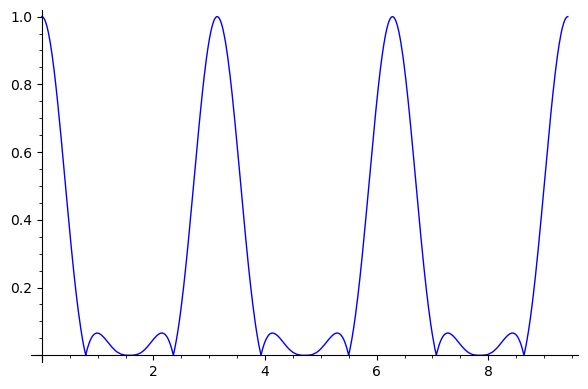

In [18]:
plot(transfer_at_time_a(X,x,0,0),0,3*np.pi)

In [19]:
from scipy import optimize
f = lambda x : transfer_at_time_a(X,x,0,0)
root = optimize.root(f, 0.5); root

    fjac: array([[-1.]])
     fun: 0.0
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-0.00029004])
       r: array([0.71879961])
  status: 1
 success: True
       x: array([0.78539199])

In [20]:
GX = Graph(matrix(np.abs(np.matrix(X))))
GX.plot3d()

Graphics3d Object